In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tkh5044/portfolio/master/capstone-predicting-game-attendance/data/all-teams-1990-2016.csv')
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [ ]:
# drop years before 2010 -> one year of data
df['date'] = pd.to_datetime(df['date'])
df = df[df.date > '1996-01-01']
df.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
0,1997-04-02,ANA,BOS,0,0.0,0 days 03:47:00.000000000,30874,0,0,0.000000,...,1997,4,2,2,Wednesday,Angel Stadium,33851,29.7,28.3,0
1,1997-04-03,ANA,BOS,3,-1.0,0 days 02:07:00.000000000,17323,-1,0,5.000000,...,1997,4,3,3,Thursday,Angel Stadium,33851,29.7,28.3,0
2,1997-08-22,ANA,BOS,2,-2.5,0 days 03:25:00.000000000,24977,-3,0,5.273438,...,1997,8,22,4,Friday,Angel Stadium,33851,29.7,28.3,0
3,1997-08-23,ANA,BOS,2,-2.5,0 days 02:49:00.000000000,20994,1,0,5.294574,...,1997,8,23,5,Saturday,Angel Stadium,33851,29.7,28.3,0
4,1997-08-24,ANA,BOS,2,-1.5,0 days 02:36:00.000000000,20733,2,0,5.300000,...,1997,8,24,6,Sunday,Angel Stadium,33851,29.7,28.3,0


In [ ]:
# use only Oakland A's data
df_OAK = df[df.team_x == "OAK"]
df_OAK = df_OAK.sort_values(by=['date'])
df_OAK.head()

,date,team_x,opponent,div_rank,gb,time,attendance,streak,double_header,runs_pg,...,year,month,day,weekday,weekday_name,stadium,capacity,bat_age,pitch_age,division_game
52627,1996-04-01,OAK,TOR,0,0.0,0 days 03:02:00.000000000,7294,0,0,0.000000,...,1996,4,1,0,Monday,O.co Coliseum,39875,28.2,27.1,0
52628,1996-04-03,OAK,TOR,4,-1.0,0 days 03:12:00.000000000,8050,-1,0,6.000000,...,1996,4,3,2,Wednesday,O.co Coliseum,39875,28.2,27.1,0
52460,1996-04-04,OAK,DET,4,-2.0,0 days 04:47:00.000000000,8346,-2,0,5.000000,...,1996,4,4,3,Thursday,O.co Coliseum,39875,28.2,27.1,0
52461,1996-04-05,OAK,DET,4,-3.0,0 days 02:50:00.000000000,11149,-3,0,6.333333,...,1996,4,5,4,Friday,O.co Coliseum,39875,28.2,27.1,0
52462,1996-04-06,OAK,DET,4,-2.5,0 days 03:03:00.000000000,10424,1,0,8.000000,...,1996,4,6,5,Saturday,O.co Coliseum,39875,28.2,27.1,0


In [ ]:
df_OAK.shape

(1694, 27)

(array([ 97., 393., 366., 319., 212., 152.,  72.,  46.,  20.,  17.]),
 array([ 4651. ,  9784.8, 14918.6, 20052.4, 25186.2, 30320. , 35453.8,
        40587.6, 45721.4, 50855.2, 55989. ]),
 <a list of 10 Patch objects>)

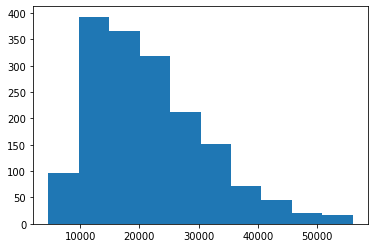

In [ ]:
plt.hist([df_OAK["attendance"]])

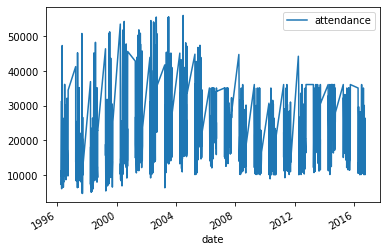

In [ ]:
pd.DataFrame(df_OAK,columns=['date','attendance']).plot(x ='date', y='attendance', kind = 'line')

In [ ]:
df_OAK.describe()


,div_rank,gb,attendance,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,...,win_pct,night_game,year,month,day,weekday,capacity,bat_age,pitch_age,division_game
count,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,...,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000,1694.000000
mean,2.631051,-6.368359,21442.347107,0.340024,0.005313,4.534373,4.606769,4.424321,0.457022,0.012397,...,0.493206,0.564345,2006.018300,6.562574,15.180047,3.178867,38701.275089,28.460921,27.815762,0.345927
std,1.176258,6.771311,9776.042320,2.653459,0.072717,0.856607,1.675227,1.559279,0.191175,0.110681,...,0.110113,0.495989,6.046211,1.729298,8.969664,1.991239,4151.779360,0.686187,1.380826,0.475810
min,0.000000,-26.000000,4651.000000,-9.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.000000,1996.000000,3.000000,1.000000,0.000000,34077.000000,27.200000,25.700000,0.000000
25%,2.000000,-10.500000,14075.000000,-1.000000,0.000000,4.172414,3.425000,3.200000,0.300000,0.000000,...,0.444444,0.000000,2001.000000,5.000000,7.000000,1.000000,35067.000000,27.900000,27.000000,0.000000
50%,3.000000,-5.000000,19694.500000,1.000000,0.000000,4.592848,4.400000,4.200000,0.400000,0.000000,...,0.500000,1.000000,2006.000000,7.000000,16.000000,3.000000,35067.000000,28.600000,27.800000,0.000000
75%,4.000000,-1.000000,26776.500000,2.000000,0.000000,4.959562,5.600000,5.400000,0.600000,0.000000,...,0.558028,1.000000,2011.000000,8.000000,22.000000,5.000000,43662.000000,29.000000,28.200000,1.000000
max,5.000000,8.500000,55989.000000,19.000000,1.000000,8.000000,12.400000,11.200000,1.000000,1.000000,...,1.000000,1.000000,2016.000000,10.000000,31.000000,6.000000,43662.000000,29.600000,31.400000,1.000000


In [ ]:
df_OAK.columns

Index(['date', 'team_x', 'opponent', 'div_rank', 'gb', 'time', 'attendance',
       'streak', 'double_header', 'runs_pg', 'runs_ma', 'runs_allowed_ma',
       'ten_game', 'opening_day', 'total_games', 'win_pct', 'night_game',
       'year', 'month', 'day', 'weekday', 'weekday_name', 'stadium',
       'capacity', 'bat_age', 'pitch_age', 'division_game'],
      dtype='object')

In [ ]:
#bat_age -> average age of batter, pitch_age -> average age of pitcher, dont really help that much

In [ ]:
df_OAK.dtypes

date               datetime64[ns]
team_x                     object
opponent                   object
div_rank                    int64
gb                        float64
time                       object
attendance                  int64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
weekday_name               object
stadium                    object
capacity                    int64
bat_age                   float64
pitch_age                 float64
division_game               int64
dtype: object

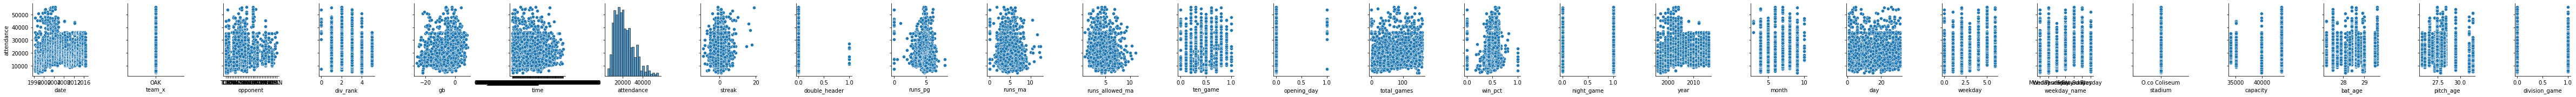

In [ ]:
sns.pairplot(
    df_OAK,
    x_vars=list(df_OAK.columns.values),
    y_vars=["attendance"],
)

In [ ]:
columns = list(df_OAK.columns.values)
columns.remove('time')
columns.remove('team_x')

In [ ]:
df_OAK = pd.get_dummies(df_OAK[columns],drop_first=True)
#df_OAK = df_OAK[columns]
df_OAK_train = df_OAK[df_OAK.date < '2016-01-01']
df_OAK_test = df_OAK[df_OAK.date > '2016-01-01']


In [ ]:
df_OAK_train.dtypes

date                      datetime64[ns]
div_rank                           int64
gb                               float64
attendance                         int64
streak                             int64
double_header                      int64
runs_pg                          float64
runs_ma                          float64
runs_allowed_ma                  float64
ten_game                         float64
opening_day                        int64
total_games                        int64
win_pct                          float64
night_game                         int64
year                               int64
month                              int64
day                                int64
weekday                            int64
capacity                           int64
bat_age                          float64
pitch_age                        float64
division_game                      int64
opponent_ARI                       uint8
opponent_ATL                       uint8
opponent_BAL    

In [ ]:
columns = list(df_OAK.columns.values)

columns.remove('attendance')
columns.remove('pitch_age')
columns.remove('bat_age')
columns.remove('capacity')
columns.remove('date')

In [ ]:
columns

['div_rank',
 'gb',
 'streak',
 'double_header',
 'runs_pg',
 'runs_ma',
 'runs_allowed_ma',
 'ten_game',
 'opening_day',
 'total_games',
 'win_pct',
 'night_game',
 'year',
 'month',
 'day',
 'weekday',
 'division_game',
 'opponent_ARI',
 'opponent_ATL',
 'opponent_BAL',
 'opponent_BOS',
 'opponent_CAL',
 'opponent_CHC',
 'opponent_CHW',
 'opponent_CIN',
 'opponent_CLE',
 'opponent_COL',
 'opponent_DET',
 'opponent_FLA',
 'opponent_HOU',
 'opponent_KCR',
 'opponent_LAA',
 'opponent_LAD',
 'opponent_MIL',
 'opponent_MIN',
 'opponent_MON',
 'opponent_NYM',
 'opponent_NYY',
 'opponent_PHI',
 'opponent_PIT',
 'opponent_SDP',
 'opponent_SEA',
 'opponent_SFG',
 'opponent_STL',
 'opponent_TBD',
 'opponent_TBR',
 'opponent_TEX',
 'opponent_TOR',
 'opponent_WSN',
 'weekday_name_Monday',
 'weekday_name_Saturday',
 'weekday_name_Sunday',
 'weekday_name_Thursday',
 'weekday_name_Tuesday',
 'weekday_name_Wednesday']

In [ ]:
X_train = df_OAK_train[columns]
X_test = df_OAK_test[columns]
y_train = df_OAK_train['attendance']
y_test = df_OAK_test['attendance']

In [ ]:
X_train.describe()

,div_rank,gb,streak,double_header,runs_pg,runs_ma,runs_allowed_ma,ten_game,opening_day,total_games,...,opponent_TBR,opponent_TEX,opponent_TOR,opponent_WSN,weekday_name_Monday,weekday_name_Saturday,weekday_name_Sunday,weekday_name_Thursday,weekday_name_Tuesday,weekday_name_Wednesday
count,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,...,1613.000000,1613.000000,1613.000000,1613.00000,1613.000000,1613.00000,1613.000000,1613.000000,1613.000000,1613.000000
mean,2.558586,-6.057657,0.378177,0.005580,4.570710,4.638913,4.416615,0.461715,0.012399,80.320521,...,0.019839,0.107874,0.058277,0.00186,0.109113,0.16119,0.160570,0.106014,0.149411,0.154371
std,1.139662,6.572163,2.669480,0.074512,0.852492,1.668791,1.564406,0.191789,0.110694,46.777079,...,0.139489,0.310317,0.234338,0.04310,0.311878,0.36782,0.367248,0.307951,0.356604,0.361416
min,0.000000,-26.000000,-9.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,-10.000000,-1.000000,0.000000,4.235294,3.600000,3.200000,0.300000,0.000000,40.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,-5.000000,1.000000,0.000000,4.619048,4.600000,4.200000,0.500000,0.000000,82.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,-1.000000,2.000000,0.000000,4.980769,5.600000,5.400000,0.600000,0.000000,120.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,5.000000,8.500000,19.000000,1.000000,8.000000,12.400000,11.200000,1.000000,1.000000,161.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train.dtypes

div_rank                    int64
gb                        float64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
division_game               int64
opponent_ARI                uint8
opponent_ATL                uint8
opponent_BAL                uint8
opponent_BOS                uint8
opponent_CAL                uint8
opponent_CHC                uint8
opponent_CHW                uint8
opponent_CIN                uint8
opponent_CLE                uint8
opponent_COL                uint8
opponent_DET                uint8
opponent_FLA                uint8
opponent_HOU  

In [ ]:
X_train.dtypes

div_rank                    int64
gb                        float64
streak                      int64
double_header               int64
runs_pg                   float64
runs_ma                   float64
runs_allowed_ma           float64
ten_game                  float64
opening_day                 int64
total_games                 int64
win_pct                   float64
night_game                  int64
year                        int64
month                       int64
day                         int64
weekday                     int64
division_game               int64
opponent_ARI                uint8
opponent_ATL                uint8
opponent_BAL                uint8
opponent_BOS                uint8
opponent_CAL                uint8
opponent_CHC                uint8
opponent_CHW                uint8
opponent_CIN                uint8
opponent_CLE                uint8
opponent_COL                uint8
opponent_DET                uint8
opponent_FLA                uint8
opponent_HOU  

In [ ]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [ ]:
X_train.shape

(1613, 55)

In [ ]:
X_test.shape

(81, 55)

In [ ]:
y_train.shape

(1613,)

In [ ]:
y_test.shape

(81,)

## Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
def trainModel(model):
  model.fit(X_train, y_train)
  score=model.score(X_test, y_test)
  mae=mean_absolute_error(y_test,model.predict(X_test))

  return score,mae

In [ ]:
trainModel(LinearRegression())

(0.5115664660287655, 3938.314872658231)

In [ ]:
trainModel(DecisionTreeRegressor())

(-0.2794382734646528, 5075.543209876543)

In [ ]:
trainModel(XGBRegressor())

[17:46:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.5632208056721109, 3732.2549189814813)

In [ ]:
trainModel(RandomForestRegressor())

(0.6015074485007308, 3435.262222222222)

In [ ]:
trainModel(XGBRFRegressor())

[17:49:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(0.22969262661376944, 5232.03035783179)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
y_test.values

array([35067, 10478, 16468, 12577, 13371, 13492, 11216, 19451, 25564,
       29668, 20159, 23084, 24135, 10535, 12584, 16238, 10068, 12718,
       14323, 17456, 28235, 26356, 25237, 22498, 24154, 20522, 17248,
       12767, 11345, 13453, 13101, 10115, 14236, 24591, 25078, 22846,
       14810, 13586, 32810, 36067, 15710, 28846, 21831, 19192, 27510,
       21626, 10651, 15143, 20231, 14412, 15250, 30436, 17642, 25182,
       32358, 23450, 10407, 13573, 13481, 16610, 14073, 35067, 21203,
       10114, 13141, 12795, 21376, 30045, 25139, 18149, 12298, 11866,
       19385, 18438, 13610, 10072, 12139, 11197, 26367, 16736, 17048])

In [ ]:
# sum = 0
# for i in range(len(predictions)):
#   sum += abs(y_test.iat[i] - int(predictions[i]))
# print(sum/len(predictions))

In [ ]:

mean_absolute_error(y_test.values, predictions)

3496.578024691358

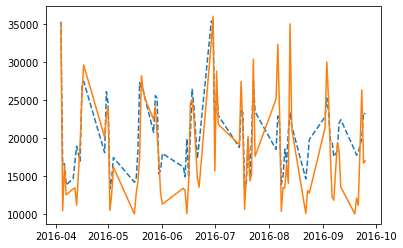

In [ ]:
plt.plot(df_OAK['date'][-81:], predictions, "--") #predicted
plt.plot(df_OAK['date'][-81:], y_test) #actual

In [ ]:
def plotModel(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  plt.plot(df_OAK['date'][-81:], predictions, "--") #predicted
  plt.plot(df_OAK['date'][-81:], y_test) #actual

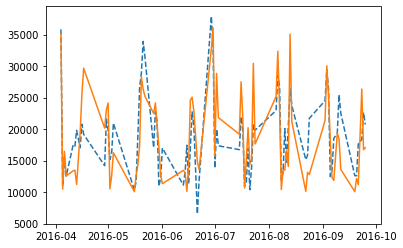

In [ ]:
plotModel(LinearRegression())

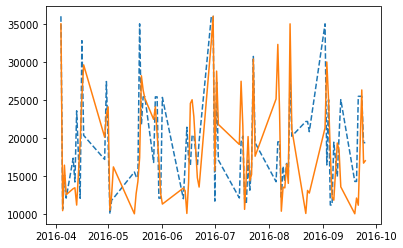

In [ ]:
plotModel(DecisionTreeRegressor())

## Hyper parameter Tuning

In [ ]:
# ensemble:
# - boosting: XGBost, GradientBoost, AdaBoost
# - bagging: Random Forest

160

### Hyper parameter tuning 1st iteration

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params={'n_estimators':[50,100,200,500],'max_depth':[2,5,10,20],'min_samples_split':[5,10]}

## 4 * 4 * 2 *5

model = RandomForestRegressor()
grid_search=GridSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 200, 500]})

In [ ]:
## Overfitting

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [ ]:
best_model1=grid_search.best_estimator_
predictions1 = best_model.predict(X_test)
trainModel(best_model1)

In [ ]:
mean_absolute_error(y_test.values, predictions1)

### Hyper parameter tuning 2nd iteration

In [ ]:
params={'n_estimators':[80,100,120],'max_depth':[9,10,11],'min_samples_split':[4,5,6]}

model = RandomForestRegressor()
grid_search=GridSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [9, 10, 11],
                         'min_samples_split': [4, 5, 6],
                         'n_estimators': [80, 100, 120]})

In [ ]:
grid_search.best_params_

{'max_depth': 11, 'min_samples_split': 6, 'n_estimators': 100}

In [ ]:
best_model2=grid_search.best_estimator_
predictions2 = best_model2.predict(X_test)
trainModel(best_model2)

In [ ]:
mean_absolute_error(y_test.values, predictions2)

3329.255038560145

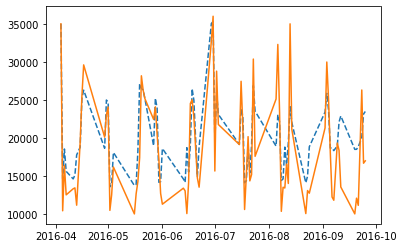

In [ ]:
plt.plot(df_OAK['date'][-81:], predictions, "--") #predicted
plt.plot(df_OAK['date'][-81:], y_test) #actual

In [ ]:
np.abs(predictions-y_test).median()

2792.707736772998

## Hyper parameter Tuning on XGBoost

In [ ]:
params={'n_estimators':[100,200,500],'max_depth':[2,5,10],'learning_rate':[0.01,0.1,0.5]}

model = XGBRegressor(objective="reg:squarederror")
grid_search=GridSearchCV(model,params,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [ ]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}

In [ ]:
best_model3=grid_search.best_estimator_
predictions3 = best_model3.predict(X_test)
trainModel(best_model3)

(0.5599916761056847, 3842.3571686921296)

In [ ]:
mean_absolute_error(y_test.values, predictions3)

3842.3571686921296

## Feature Engineering / Feature Selection

1. Create new features from the ones that we have
2. Select relevant features based on some numerical/statistical decision. .e.g feature importance from Random Forest, SHAP

In [ ]:
for ii,col in enumerate(X_train.columns):
  print(col,best_model.feature_importances_[ii])

div_rank 0.004943836680673353
gb 0.02267573784955249
streak 0.020065239944136063
double_header 4.745636522247284e-05
runs_pg 0.04229196372375593
runs_ma 0.023909536079747176
runs_allowed_ma 0.02254300018216271
ten_game 0.014829072306287208
opening_day 0.05139635519613793
total_games 0.06432139418776672
win_pct 0.10758393807707523
night_game 0.009029405840485488
year 0.1388424182857791
month 0.008197411966288082
day 0.019966068242588557
weekday 0.13785759561649394
division_game 0.0013411074691476832
opponent_ARI 0.0008692466620693561
opponent_ATL 2.4776621403225257e-05
opponent_BAL 0.000700357889094982
opponent_BOS 0.037589858069850615
opponent_CAL 0.0018369121591420062
opponent_CHC 0.00040240601295579335
opponent_CHW 0.00127106730523266
opponent_CIN 2.85694150265236e-05
opponent_CLE 0.0022255951154003615
opponent_COL 9.893192675500917e-05
opponent_DET 0.0015543157574891828
opponent_FLA 0.00011723152029033506
opponent_HOU 0.0004870879628841703
opponent_KCR 0.0009864561295104067
opponent

In [ ]:
important_features=X_train.columns[best_model.feature_importances_.argsort()[::-1]][:40]
important_features

Index(['opponent_SFG', 'year', 'weekday', 'win_pct', 'opponent_NYY',
       'total_games', 'opening_day', 'runs_pg', 'opponent_BOS', 'runs_ma',
       'gb', 'runs_allowed_ma', 'streak', 'day', 'weekday_name_Thursday',
       'ten_game', 'weekday_name_Wednesday', 'night_game', 'month',
       'opponent_LAD', 'div_rank', 'weekday_name_Saturday', 'opponent_SEA',
       'opponent_CLE', 'opponent_CAL', 'opponent_DET', 'opponent_TBD',
       'opponent_LAA', 'division_game', 'opponent_CHW', 'opponent_MIN',
       'opponent_KCR', 'weekday_name_Sunday', 'opponent_ARI',
       'weekday_name_Monday', 'opponent_TEX', 'opponent_TOR', 'opponent_BAL',
       'opponent_MIL', 'weekday_name_Tuesday'],
      dtype='object')

In [ ]:
X_train_red=X_train.loc[:,important_features]
X_test_red=X_test.loc[:,important_features]

In [ ]:
X_train.shape,X_train_red.shape

((1613, 55), (1613, 40))

In [ ]:
X_train.columns

Index(['div_rank', 'gb', 'streak', 'double_header', 'runs_pg', 'runs_ma',
       'runs_allowed_ma', 'ten_game', 'opening_day', 'total_games', 'win_pct',
       'night_game', 'year', 'month', 'day', 'weekday', 'division_game',
       'opponent_ARI', 'opponent_ATL', 'opponent_BAL', 'opponent_BOS',
       'opponent_CAL', 'opponent_CHC', 'opponent_CHW', 'opponent_CIN',
       'opponent_CLE', 'opponent_COL', 'opponent_DET', 'opponent_FLA',
       'opponent_HOU', 'opponent_KCR', 'opponent_LAA', 'opponent_LAD',
       'opponent_MIL', 'opponent_MIN', 'opponent_MON', 'opponent_NYM',
       'opponent_NYY', 'opponent_PHI', 'opponent_PIT', 'opponent_SDP',
       'opponent_SEA', 'opponent_SFG', 'opponent_STL', 'opponent_TBD',
       'opponent_TBR', 'opponent_TEX', 'opponent_TOR', 'opponent_WSN',
       'weekday_name_Monday', 'weekday_name_Saturday', 'weekday_name_Sunday',
       'weekday_name_Thursday', 'weekday_name_Tuesday',
       'weekday_name_Wednesday'],
      dtype='object')

In [ ]:
model4 = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_split=5)
model4.fit(X_train_red, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [ ]:

predictions4 = model4.predict(X_test_red)
mean_absolute_error(y_test.values, predictions4)

3329.699839893026